# Car Sales Price Prediction.

### Dataset Overview:

The dataset contains 500 entries with the following columns:

* customer name: Name of the customer.
* customer e-mail: Email address of the customer.
* country: Country of residence.
* gender: Gender encoded as 0 or 1.
* age: Age of the customer.
* annual Salary: Annual salary of the customer.
* credit card debt: Amount of credit card debt the customer has.
* net worth: Net worth of the customer.
* car purchase amount: Amount spent by the customer on car purchases.

### Problem Statement

Analyze the factors influencing the car purchase amount for customers in different countries. Develop a predictive model to estimate the car purchase amount based on demographic and financial factors such as age, gender, annual salary, credit card debt, and net worth.

Dataset link: https://www.kaggle.com/datasets/yashpaloswal/ann-car-sales-price-prediction

In [ ]:
# Importing Basic Liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('whitegrid')

In [ ]:
# Loading the dataset.
df = pd.read_csv('/content/car_purchasing.csv',encoding='ISO-8859-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


### EDA (Exploratory Data Analysis)

In [ ]:
# Shape of the Dataset.
df.shape

(500, 9)

In [ ]:
# Information about the Dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [ ]:
# Statistical Description of Data.
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [ ]:
# Droping Unwanted Columns.
df.drop(columns=['customer name','customer e-mail','country','gender'], axis=1, inplace=True)

In [ ]:
# Checking for null values in the Dataset.
df.isna().sum()

,0
age,0
annual Salary,0
credit card debt,0
net worth,0
car purchase amount,0


In [ ]:
# Checking for duplicate values in Dataset.
df.duplicated().sum()

0

In [ ]:
# Checking for Outliers
def count_outliers(df):
  outliers = {}
  for col in df.select_dtypes(include=["number"]):  # Only process numeric columns
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR
      outliers[col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
  return outliers

In [ ]:
# Count Outliers
count = count_outliers(df)
count

{'age': 4,
 'annual Salary': 2,
 'credit card debt': 7,
 'net worth': 1,
 'car purchase amount': 5}

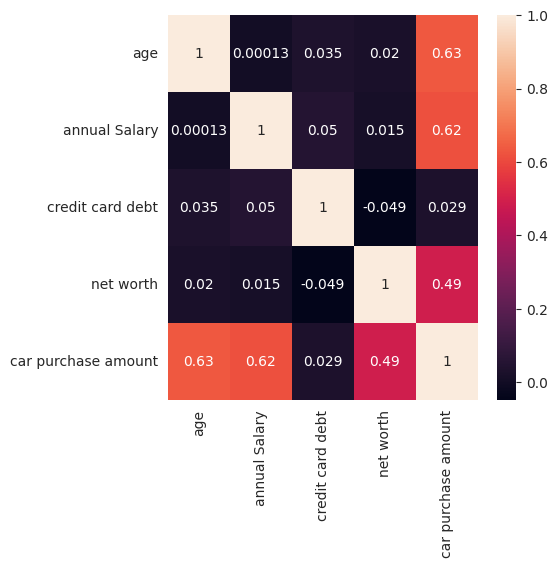

In [ ]:
# Heatmap
plt.figure(figsize=(5,5))
sns.heatmap(data=df.corr(), annot=True)
plt.show()

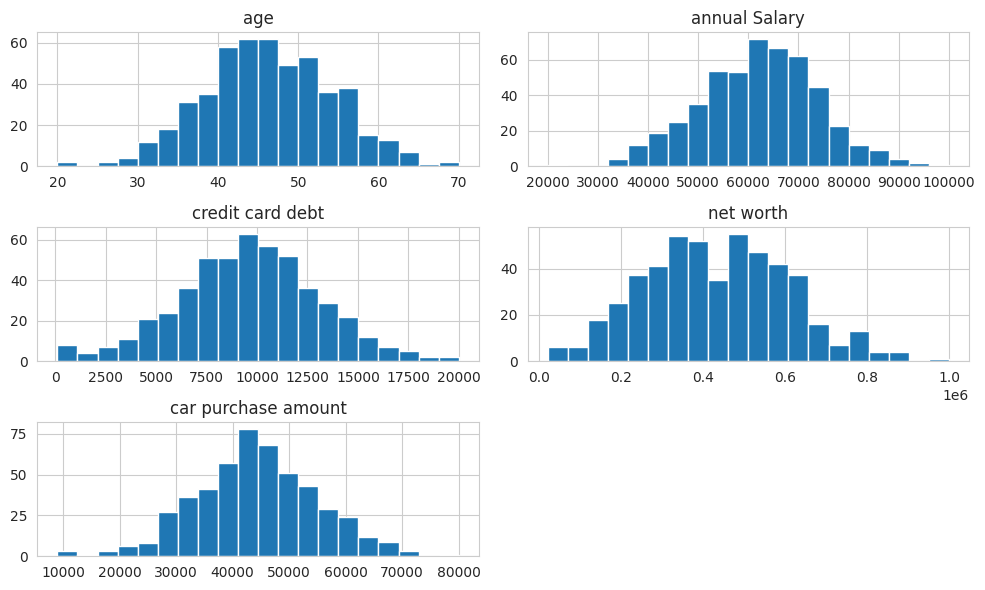

In [ ]:
# Histplot
df.hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

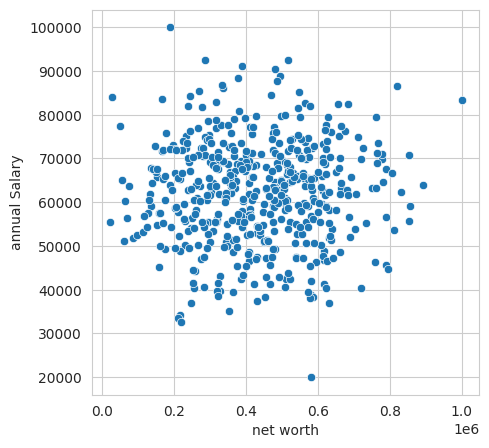

In [ ]:
# Scatter Plot.
plt.figure(figsize=(5,5))
sns.scatterplot(x='net worth', y='annual Salary', data=df)
plt.show()

<Axes: xlabel='age_group', ylabel='car purchase amount'>

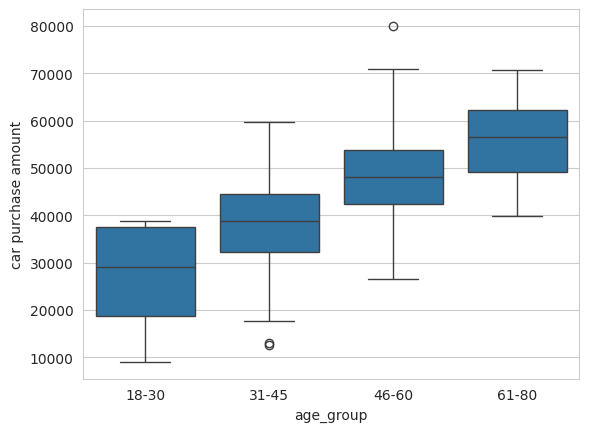

In [ ]:
# Facet Grid
age_bins = pd.cut(df['age'], bins=[18, 30, 45, 60, 80], labels=['18-30', '31-45', '46-60', '61-80'])
df['age_group'] = age_bins
sns.boxplot(x='age_group', y='car purchase amount', data=df)

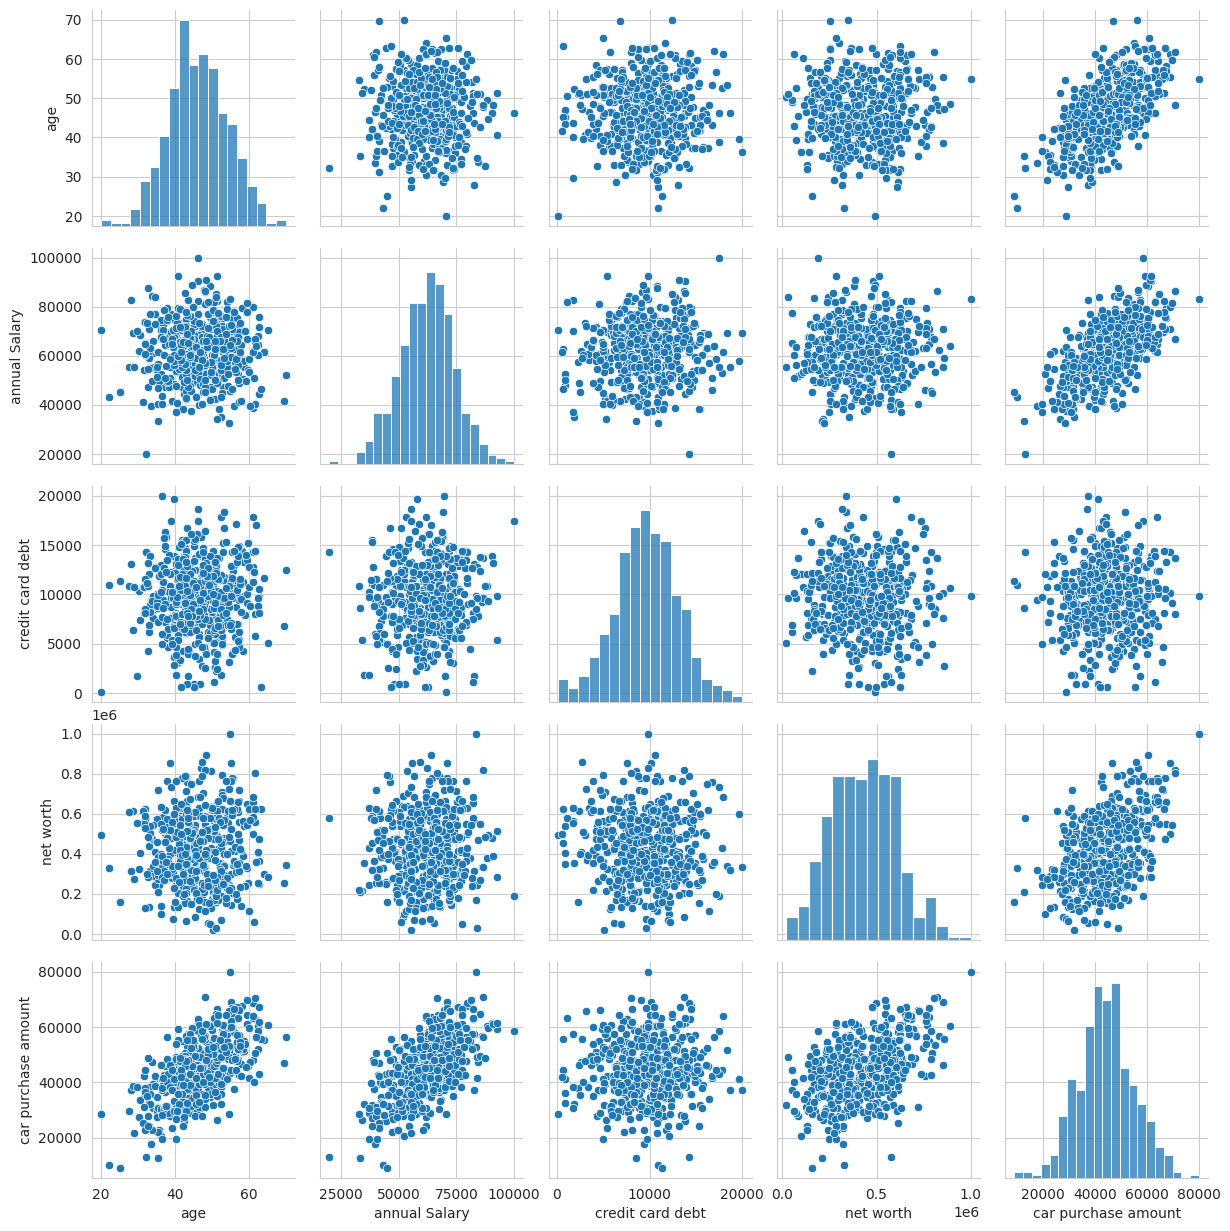

In [ ]:
# Pair Plot.
sns.pairplot(df)

# Data Preprocessing.

In [ ]:
# Splitting columns.
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [ ]:
Y=Y.values.reshape(-1,1)

In [ ]:
# Scaling the Data.
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y)

# Data Splitting.

In [ ]:
# Splitting Data for Training and Testing.
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, shuffle=True, random_state=42)

In [ ]:
# x_train variable shape
x_train.shape

(450, 4)

In [ ]:
# y_test variable shape
y_test.shape

(50, 1)

# Linear Regression

In [ ]:
# Initialize the model.
model = LinearRegression()

# Traning the model.
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Score of the model.
model.score(x_train,y_train)

0.9999999811362869

In [ ]:
# Model Prediction
y_pred = model.predict(x_test)

In [ ]:
# Mean Squared Error.
mse = mean_squared_error(y_test,y_pred)
mse

3.9922134535627505e-10

In [ ]:
# R2_score
r2 = r2_score(y_test,y_pred)
r2

0.9999999803460698

# Lasso Regression

In [ ]:
# Lasso Regression.
lasso = Lasso(alpha=0.0001)
lasso.fit(x_train,y_train)

Lasso(alpha=0.0001)

In [ ]:
# Lasso Regression Score.
lasso.score(x_train,y_train)

0.9999500261061571

In [ ]:
# Lasso Regression Prediction
lasso_pred = lasso.predict(x_test)

In [ ]:
# Lasso : Mean Squared Error.
mse = mean_squared_error(y_test,lasso_pred)
mse

1.1328596202806528e-06

In [ ]:
# Lasso : R2 Score
r2 = r2_score(y_test,lasso_pred)
r2

0.9999442285736122

# Ridge Regression

In [ ]:
# Ridge Regression
ridge = Ridge(alpha=0.001)
ridge.fit(x_train,y_train)

Ridge(alpha=0.001)

In [ ]:
# Ridge Score
ridge.score(x_train,y_train)

0.9999999732587215

In [ ]:
# Ridge Prediction.
ridge_pred = ridge.predict(x_test)

In [ ]:
# Ridge : Mean Squared Error
mse = mean_squared_error(y_test,ridge_pred)
mse

5.20154186044868e-10

In [ ]:
# Ridge : R2 Score.
r2 = r2_score(y_test,ridge_pred)
r2

0.9999999743924664

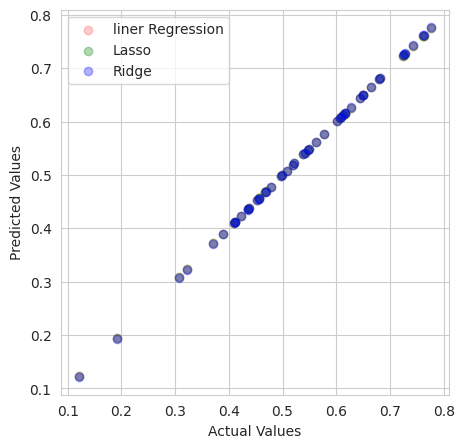

In [ ]:
plt.figure(figsize=(5,5))

plt.scatter(y_test,lasso_pred,c='r',alpha=0.2,label='liner Regression')
plt.scatter(y_test,lasso_pred, c='g',alpha=0.3,label='Lasso')
plt.scatter(y_test,ridge_pred,c='b',alpha=0.3, label='Ridge')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()